Obs 0886090801 source 001. Not first X-ray detection. (268.3681, -24.7743 0.05")

SIMBAD HD 162718 
+ Be Star. 
+ Parallax 0.5548 mas. Distance 1800 pc.
+ Gaia 4067633238255477248


Temporal features:
+ Lightcurves show some varilability, across energy range.
+ Lightcurve duration ~20ks.
+ FFTs show no significant features that can be identified.
+ HENDRICS Z2n search for pulsations finds several candidate frequencies. 
+ Strongest candidate is 0.1253049943 mHz, so period of 7.98ks.

Spectral features:
+ Flux 8.8x10^-12 erg/s/cm^2
+ Fit to power law with photon index 1.34 and nH 0.4 x 10^22 /cm^2 which is less than the galactic value of 1.1.
+ G-magnitude 8.396
+ Fx/Fopt = 0.00073

Conclusion:

Source is likely a BE type star, where we have been able to identify the pulsations. The period of the pulsations is in line with those detected in similar objects.

In [1]:
%load_ext wurlitzer
import numpy as np
import os
import stingray as st
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [15, 8]

lc = fits.open('0886090801_PN1_dt1.lc')
bkg = fits.open('0886090801_PN1_dt1_bkg.lc')
full_gti = []
for j in lc[2].data:
    full_gti.append([j[0],j[1]])
soft = fits.open('0886090801_PN1_dt1_0.2-2keV.lc')
sbkg = fits.open('0886090801_PN1_dt1_0.2-2keV_bkg.lc')
soft_gti = []
for j in soft[2].data:
    soft_gti.append([j[0],j[1]])
hard = fits.open('0886090801_PN1_dt1_2-12keV.lc')
hbkg = fits.open('0886090801_PN1_dt1_2-12keV_bkg.lc')
hard_gti = []
for j in hard[2].data:
    hard_gti.append([j[0],j[1]])

In [2]:
full_lc = st.Lightcurve(lc[1].data.field('TIME'),lc[1].data.field('RATE'),err=lc[1].data.field('ERROR'),gti=full_gti,input_counts=False)
full_bkg = st.Lightcurve(bkg[1].data.field('TIME'),bkg[1].data.field('RATE'),err=bkg[1].data.field('ERROR'),gti=full_gti,input_counts=False)

soft_lc = st.Lightcurve(soft[1].data.field('TIME'),soft[1].data.field('RATE'),err=soft[1].data.field('ERROR'),gti=soft_gti,input_counts=False)
soft_bkg = st.Lightcurve(sbkg[1].data.field('TIME'),sbkg[1].data.field('RATE'),err=sbkg[1].data.field('ERROR'),gti=soft_gti,input_counts=False)

hard_lc = st.Lightcurve(hard[1].data.field('TIME'),hard[1].data.field('RATE'),err=hard[1].data.field('ERROR'),gti=hard_gti,input_counts=False)
hard_bkg = st.Lightcurve(hbkg[1].data.field('TIME'),hbkg[1].data.field('RATE'),err=hbkg[1].data.field('ERROR'),gti=hard_gti,input_counts=False)

full_lc.apply_gtis()
full_bkg.apply_gtis()
soft_lc.apply_gtis()
soft_bkg.apply_gtis()
hard_lc.apply_gtis()
hard_bkg.apply_gtis()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:516: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:516: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


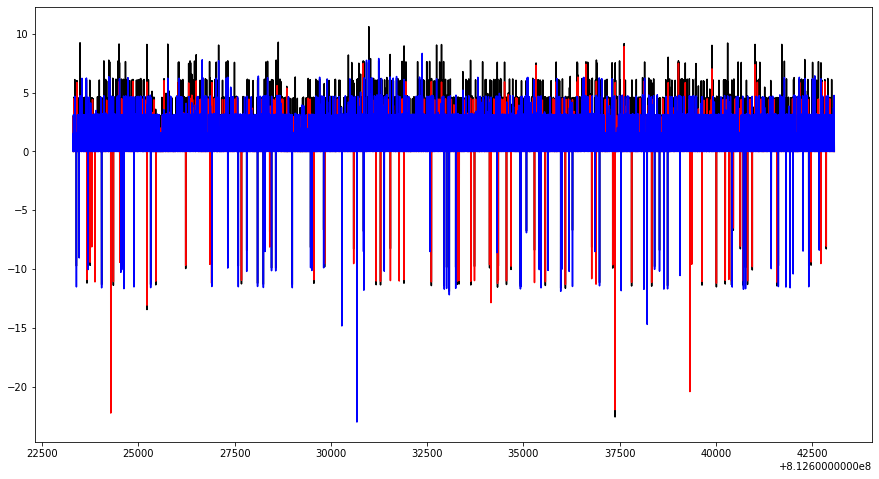

In [3]:
plt.plot(full_lc.time,full_lc.countrate,color='k')
plt.plot(soft_lc.time,soft_lc.countrate,color='r')
plt.plot(hard_lc.time,hard_lc.countrate,color='b')

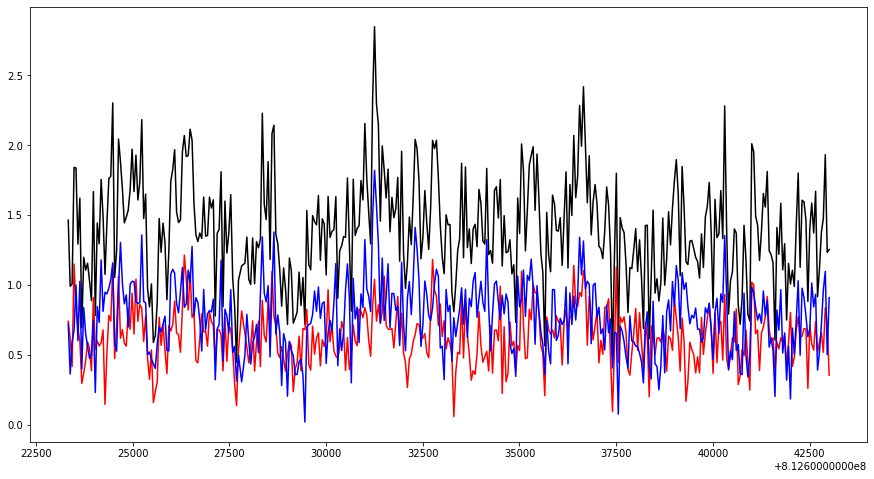

In [4]:
plt.plot(full_lc.rebin(50).time,full_lc.rebin(50).countrate,color='k')
plt.plot(soft_lc.rebin(50).time,soft_lc.rebin(50).countrate,color='r')
plt.plot(hard_lc.rebin(50).time,hard_lc.rebin(50).countrate,color='b')

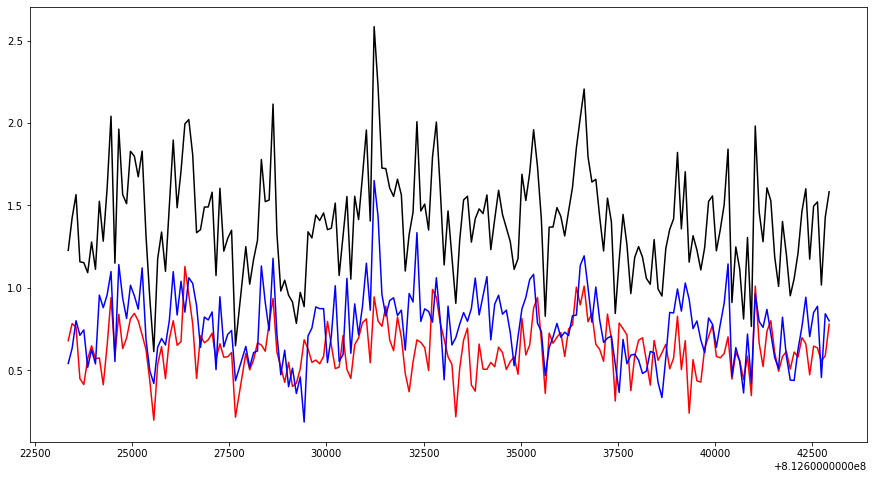

In [5]:
plt.plot(full_lc.rebin(100).time,full_lc.rebin(100).countrate,color='k')
plt.plot(soft_lc.rebin(100).time,soft_lc.rebin(100).countrate,color='r')
plt.plot(hard_lc.rebin(100).time,hard_lc.rebin(100).countrate,color='b')

In [6]:
full_psd = st.AveragedPowerspectrum(full_lc,segment_size=5000)
soft_psd = st.AveragedPowerspectrum(soft_lc,segment_size=5000)
hard_psd = st.AveragedPowerspectrum(hard_lc,segment_size=5000)

3it [00:00, 1701.31it/s]
3it [00:00, 1971.63it/s]
3it [00:00, 1768.75it/s]


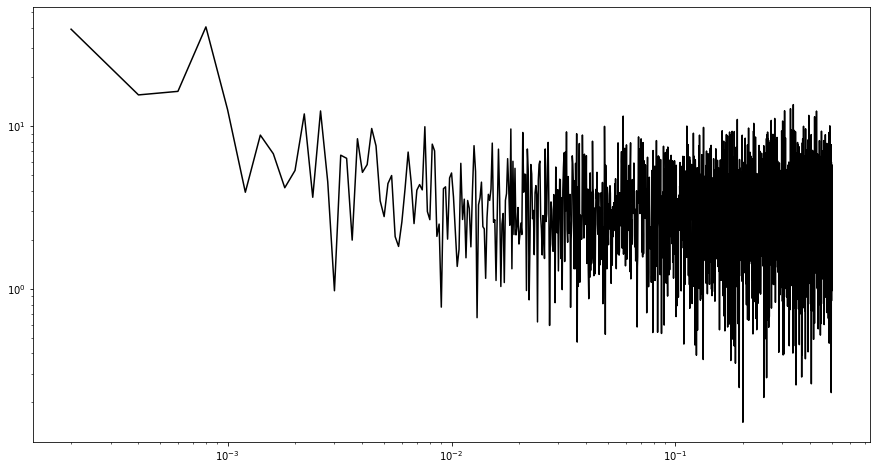

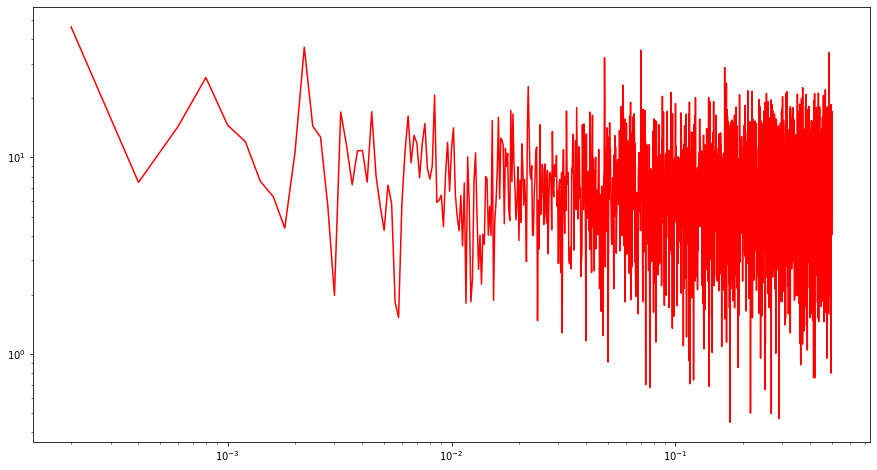

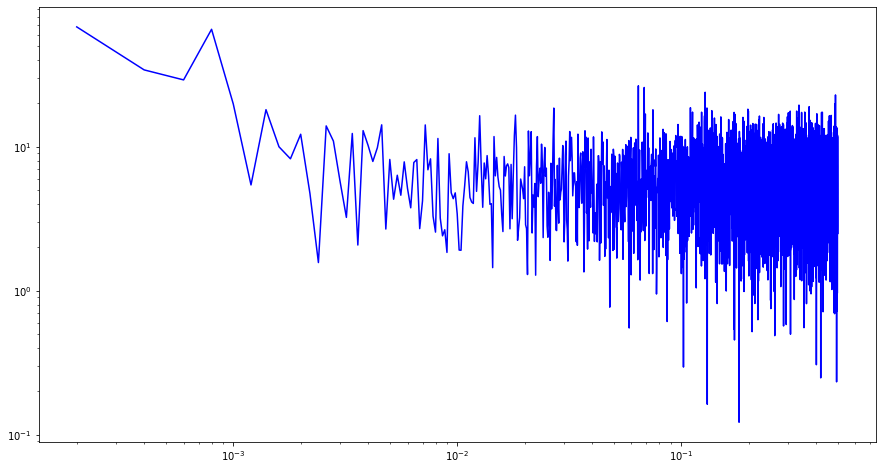

In [7]:
plt.loglog(full_psd.freq,full_psd.power,color='k')
plt.show()
plt.loglog(soft_psd.freq,soft_psd.power,color='r')
plt.show()
plt.loglog(hard_psd.freq,hard_psd.power,color='b')
plt.show()

In [8]:
full_psd10 = st.AveragedPowerspectrum(full_lc.rebin(10),segment_size=5000)
soft_psd10 = st.AveragedPowerspectrum(soft_lc.rebin(10),segment_size=5000)
hard_psd10 = st.AveragedPowerspectrum(hard_lc.rebin(10),segment_size=5000)

3it [00:00, 3377.96it/s]
3it [00:00, 2011.34it/s]
3it [00:00, 3737.13it/s]


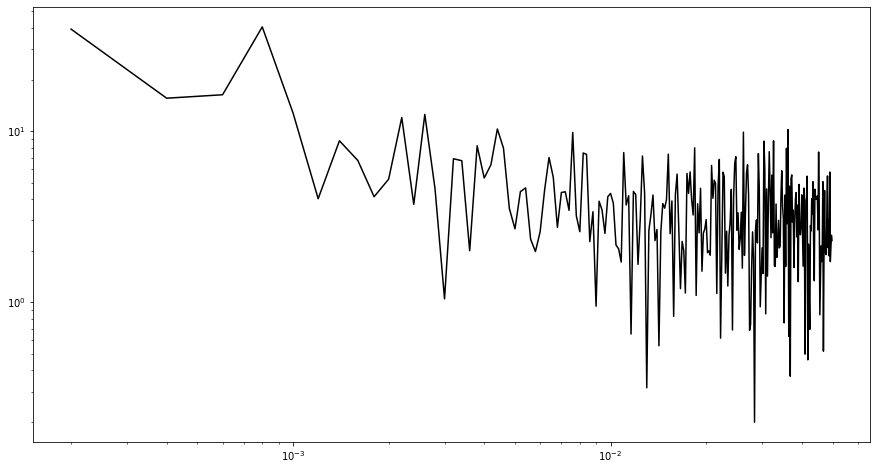

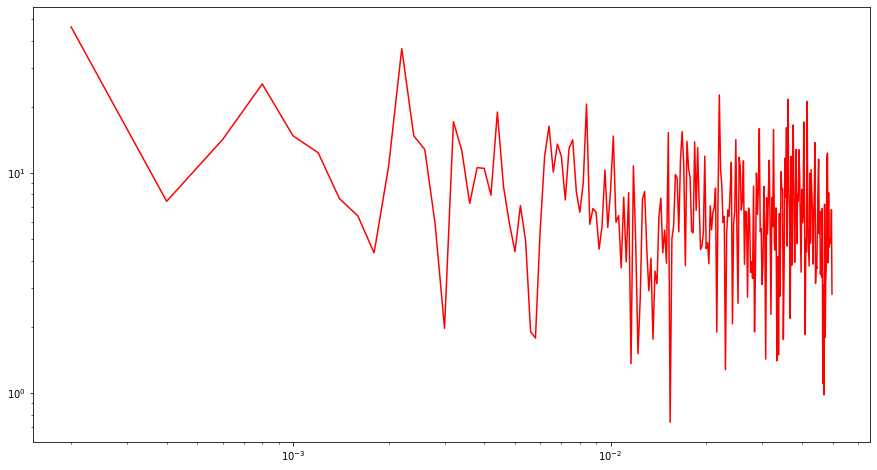

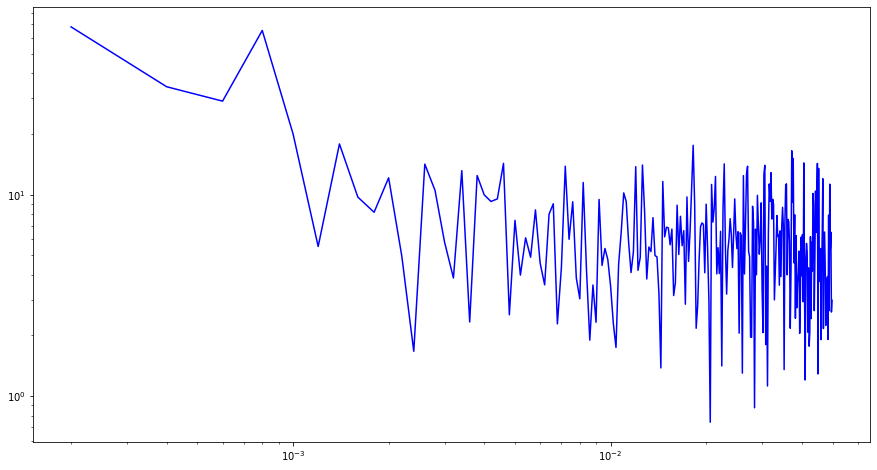

In [9]:
plt.loglog(full_psd10.freq,full_psd10.power,color='k')
plt.show()
plt.loglog(soft_psd10.freq,soft_psd10.power,color='r')
plt.show()
plt.loglog(hard_psd10.freq,hard_psd10.power,color='b')
plt.show()

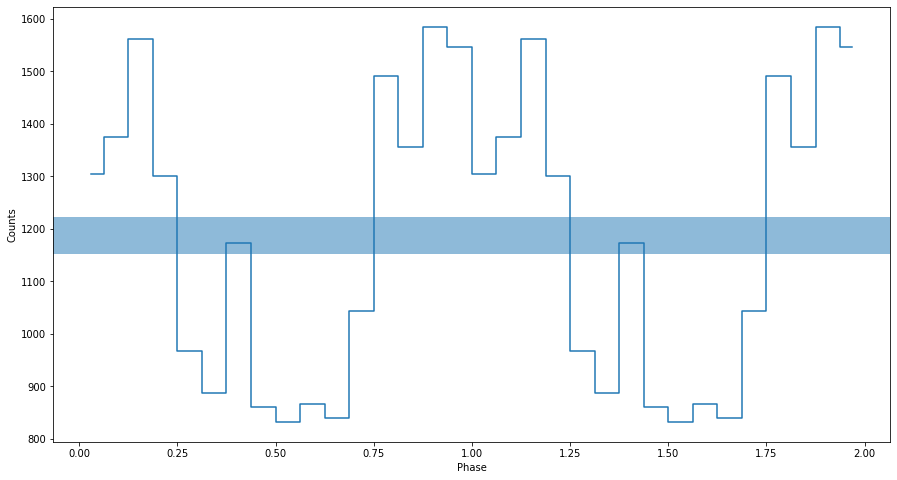

In [13]:
from stingray.pulse.pulsar import fold_events
from stingray.pulse.search import plot_profile
from stingray.pulse.search import epoch_folding_search, z_n_search
f0 = 0.0001253049943
P = 1 / f0
source_events = st.EventList.read('0886090801_PN1_src.evt',fmt_='hea',skip_checks=True)
ph, profile, profile_err = fold_events(source_events.time, f0)
_ = plot_profile(ph,profile)